In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
warnings.filterwarnings("ignore")


In [2]:
import tensorflow as tf 
from tensorflow import keras

In [3]:
(X_train, y_train), (X_test, y_test) = tf.keras.datasets.mnist.load_data()

In [4]:
X_train = X_train/255 
X_test = X_test/255

In [5]:
X_train.shape , y_train.shape

((60000, 28, 28), (60000,))

In [6]:
X_train[0].shape #first pic 

(28, 28)

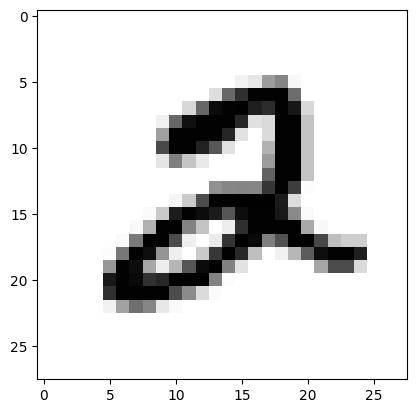

In [7]:
plt.imshow(X_train[5] , cmap='binary')
plt.show()

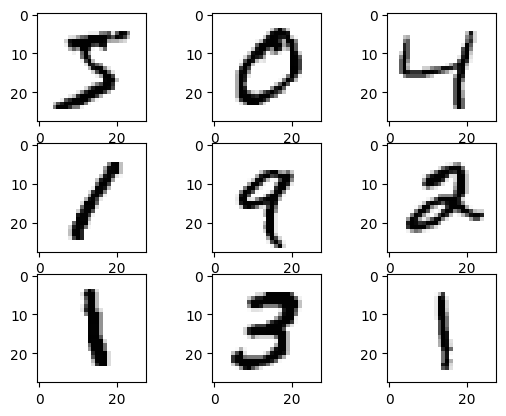

In [8]:
for i in range (9):
  plt.subplot(3 ,3 , i+1) 
  plt.imshow(X_train[i] , cmap='binary')
plt.show()

In [9]:
def reset_graph(seed=41):
    tf.random.set_seed(seed)
    np.random.seed(seed)

In [10]:
encoding_dim = 32  

reset_graph()

encoded = tf.keras.models.Sequential()
encoded.add(tf.keras.layers.Flatten(input_shape=(28,28)))

encoded.add(tf.keras.layers.Dense(512 , activation='relu'))
encoded.add(tf.keras.layers.Dense(128 , activation='relu'))
encoded.add(tf.keras.layers.Dense(64 , activation='relu'))


encoded.add(tf.keras.layers.Dense(encoding_dim, activation='sigmoid'))


In [11]:
decoded = tf.keras.models.Sequential()

decoded.add(tf.keras.layers.Dense(64 , input_shape=(encoding_dim , )))

decoded.add(tf.keras.layers.Dense(128 , activation='relu'))
decoded.add(tf.keras.layers.Dense(512 , activation='relu'))
decoded.add(tf.keras.layers.Dense(784, activation='sigmoid'))

decoded.add(tf.keras.layers.Reshape((28,28)))


In [12]:
img  = tf.keras.layers.Input(shape=(28,28))
encoding_vector = encoded(img)
output = decoded(encoding_vector)
model = tf.keras.models.Model(inputs= img , outputs = output)

In [13]:
model.output_shape

(None, 28, 28)

In [14]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 28, 28)]          0         
                                                                 
 sequential (Sequential)     (None, 32)                477920    
                                                                 
 sequential_1 (Sequential)   (None, 28, 28)            478672    
                                                                 
Total params: 956,592
Trainable params: 956,592
Non-trainable params: 0
_________________________________________________________________


In [15]:
reset_graph()
model.compile(loss='binary_crossentropy' , optimizer='adam'  , metrics=['accuracy'])


In [17]:
reset_graph()
model.fit(X_train ,X_train, batch_size=64 , epochs= 5  , validation_split=0.2)

Epoch 1/5
750/750 [==============================] - 20s 26ms/step - loss: 0.1447 - accuracy: 0.2077 - val_loss: 0.1358 - val_accuracy: 0.2271
Epoch 2/5
750/750 [==============================] - 18s 23ms/step - loss: 0.1279 - accuracy: 0.2314 - val_loss: 0.1225 - val_accuracy: 0.2451
Epoch 3/5
750/750 [==============================] - 19s 25ms/step - loss: 0.1186 - accuracy: 0.2442 - val_loss: 0.1159 - val_accuracy: 0.2551
Epoch 4/5
750/750 [==============================] - 18s 24ms/step - loss: 0.1129 - accuracy: 0.2529 - val_loss: 0.1119 - val_accuracy: 0.2685
Epoch 5/5
750/750 [==============================] - 20s 27ms/step - loss: 0.1091 - accuracy: 0.2607 - val_loss: 0.1084 - val_accuracy: 0.2708
